## Contexto
### Este conjunto de dados é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais. O objetivo do conjunto de dados é prever diagnosticamente se um paciente tem ou não diabetes, com base em certas medidas de diagnóstico incluídas no conjunto de dados. Várias restrições foram colocadas na seleção dessas instâncias de um banco de dados maior. Em particular, todos os pacientes aqui são mulheres com pelo menos 21 anos de ascendência indígena Pima.
## Contém
### O conjunto de dados consiste em várias variáveis preditoras médicas e uma variável alvo (Resultado). As variáveis preditoras incluem o número de gestações que a paciente teve, seu IMC, nível de insulina, idade e assim por diante

## Análise 1: Estratégias para dados desequilibrados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


ireis separar a variável alvo nesse momento por praticidade


In [4]:
x_data = dataset.drop(labels='Outcome', axis=1)
y_data = dataset['Outcome']

Algumas análises descritivas

In [5]:
x_data.describe().T.sort_index()

,count,mean,std,min,25%,50%,75%,max
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00


In [6]:
copy = x_data.copy()

Algumas variáveis apresentam valores 0. Isso significa valores ausentes já que essas variáveis normalmente não apresentam valores 0. Primeiro irei transforma-lás em NaN que ficara mais fáciltrata-lás.

Contagem de valores nulos

In [7]:
vars = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
x_data[vars] = x_data[vars].replace(0, np.NaN)
x_data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

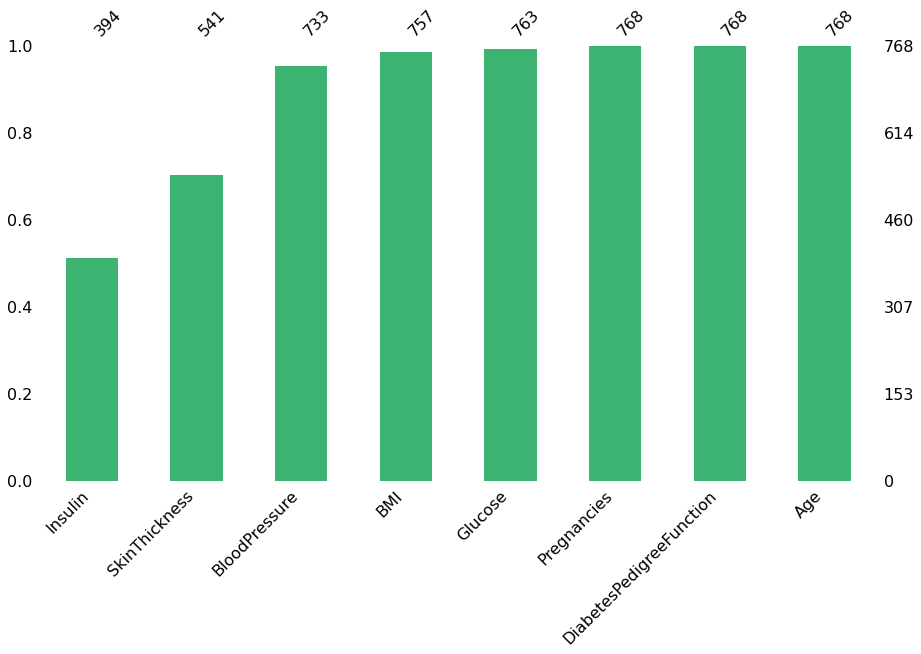

In [8]:
msno.bar(x_data, figsize=(15,8), sort='ascending', color='MediumSeaGreen')

Distribuição de frequência das variáveis

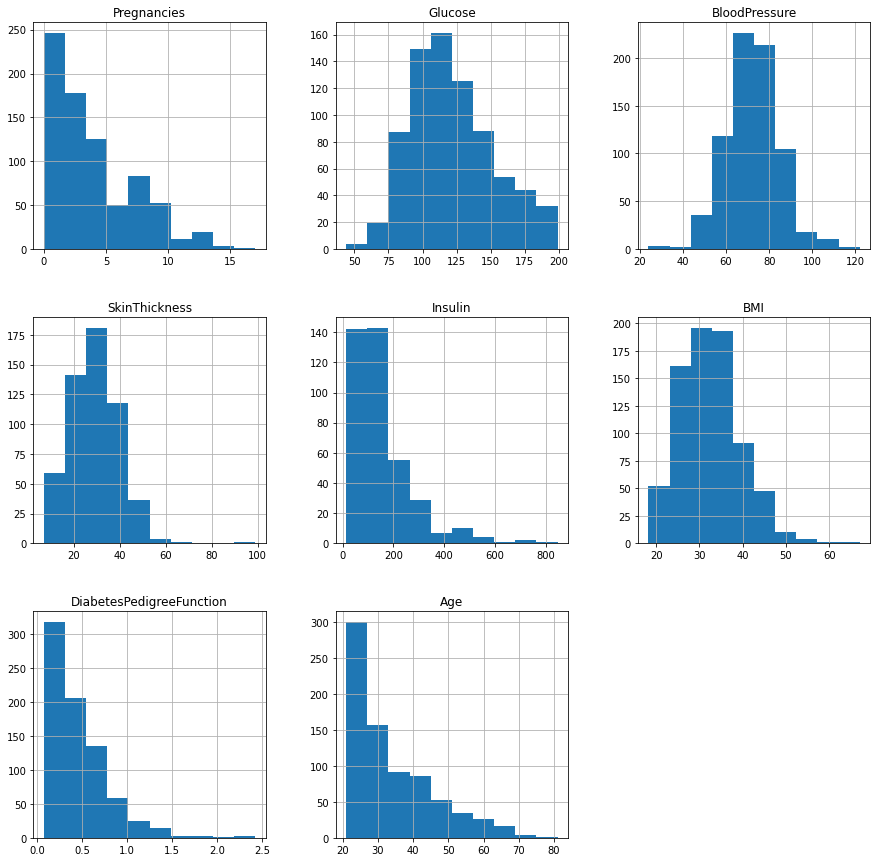

In [9]:
x_data.hist(figsize=(15,15))
plt.show()

Irei preencher os valores ausentes atráves de uma estimativa linear

In [10]:
x_data['Insulin'] = x_data['Insulin'].interpolate(limit_direction='both', axis=0)
x_data['Glucose'] = x_data['Glucose'].interpolate(limit_direction='forward', axis=0)
x_data['BloodPressure'] = x_data['BloodPressure'].interpolate(limit_direction='forward', axis=0)
x_data['SkinThickness'] = x_data['SkinThickness'].interpolate(limit_direction='forward', axis=0)
x_data['BMI'] = x_data['BMI'].interpolate(limit_direction='forward', axis=0)

Distribuição de frequência das variáveis após o preenchimento

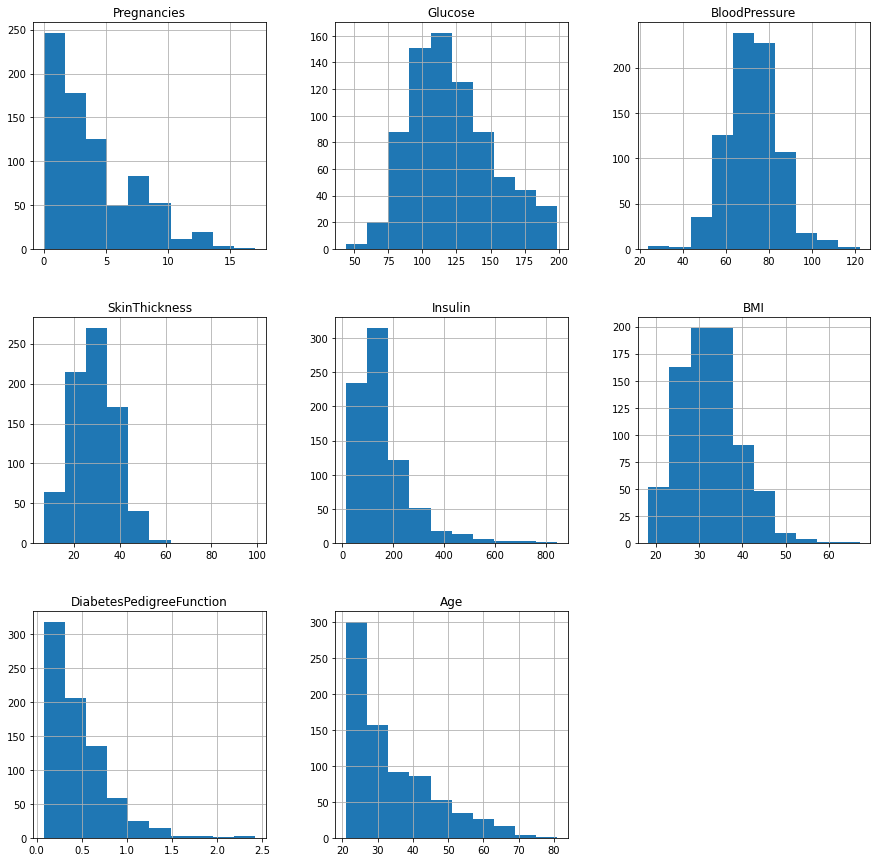

In [11]:
x_data.hist(figsize=(15,15))
plt.show()

In [12]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 48.1 KB


aqui irei padronizar as variáveis

In [13]:
padronizador = StandardScaler()
padronizador.fit(x_data)
x_padrao = padronizador.transform(x_data)

criar um dataframe expecifico para plotagem

In [14]:
x_padrao = pd.DataFrame(x_padrao, columns=copy.keys())
dados = pd.concat([y_data, x_padrao], axis=1)
dados_plot = pd.melt(dados, id_vars='Outcome', var_name='variaveis', value_name='valores')
dados_plot

,Outcome,variaveis,valores
0,1,Pregnancies,0.639947
1,0,Pregnancies,-0.844885
2,1,Pregnancies,1.233880
3,0,Pregnancies,-0.844885
4,1,Pregnancies,-1.141852
...,...,...,...
6139,0,Age,2.532136
6140,0,Age,-0.531023
6141,0,Age,-0.275760
6142,1,Age,1.170732


In [15]:
sns.set_style('darkgrid')

Plotagem

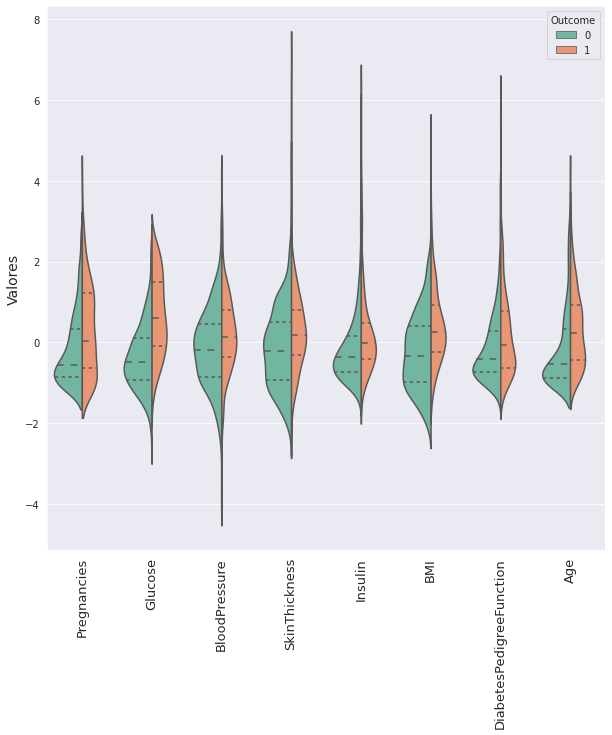

In [16]:
plt.figure(figsize=(10,10))
sns.violinplot(x='variaveis', y='valores', hue='Outcome',
                split=True, palette='Set2', scale='count', inner='quartile', data=dados_plot)
plt.xticks(rotation=90, fontsize=13)
plt.ylabel('Valores', fontsize=14)
plt.xlabel(None)
plt.show()

Plotei o gráfico de violino de uma maneira que a distribuição de frequência de cada variável leve em consideração a relação do valor com a classe(0/1), ou seja, podemos ver que existem mais valores que caem na classe 0 do que na classe 1.

como podemos observar também aqui em baixo

In [17]:
dados['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [18]:
np.sum(dados['Outcome']) / dados.shape[0]

0.3489583333333333

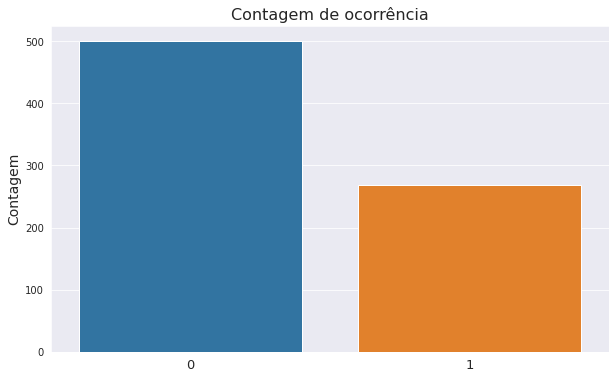

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='Outcome', data=dados)
plt.title('Contagem de ocorrência', fontsize=16)
plt.ylabel('Contagem', fontsize=14)
plt.xlabel(None)
plt.xticks(fontsize=13)
plt.show()

O problema da classe rara.

Em muitos casos, existe um desequilíbrio nas classes a serem previstas, com uma classe muito mais prevalente que outra. Para esses casos existem estratégias para equilibrar as classes.

Geração de dados.

o algoritmo SMOTE cria um registro sintético que é semelhante aos seus vizinhos mais próximos

In [20]:
sm = SMOTE(sampling_strategy=0.8 ,random_state=2022, k_neighbors=7)
X, Y = sm.fit_resample(x_padrao, y_data)

In [21]:
Y.value_counts()

0    500
1    400
Name: Outcome, dtype: int64

In [22]:
dados2 = pd.concat([Y, X], axis=1)
dados_plot2 = pd.melt(dados2, id_vars='Outcome', var_name='variaveis', value_name='valores')

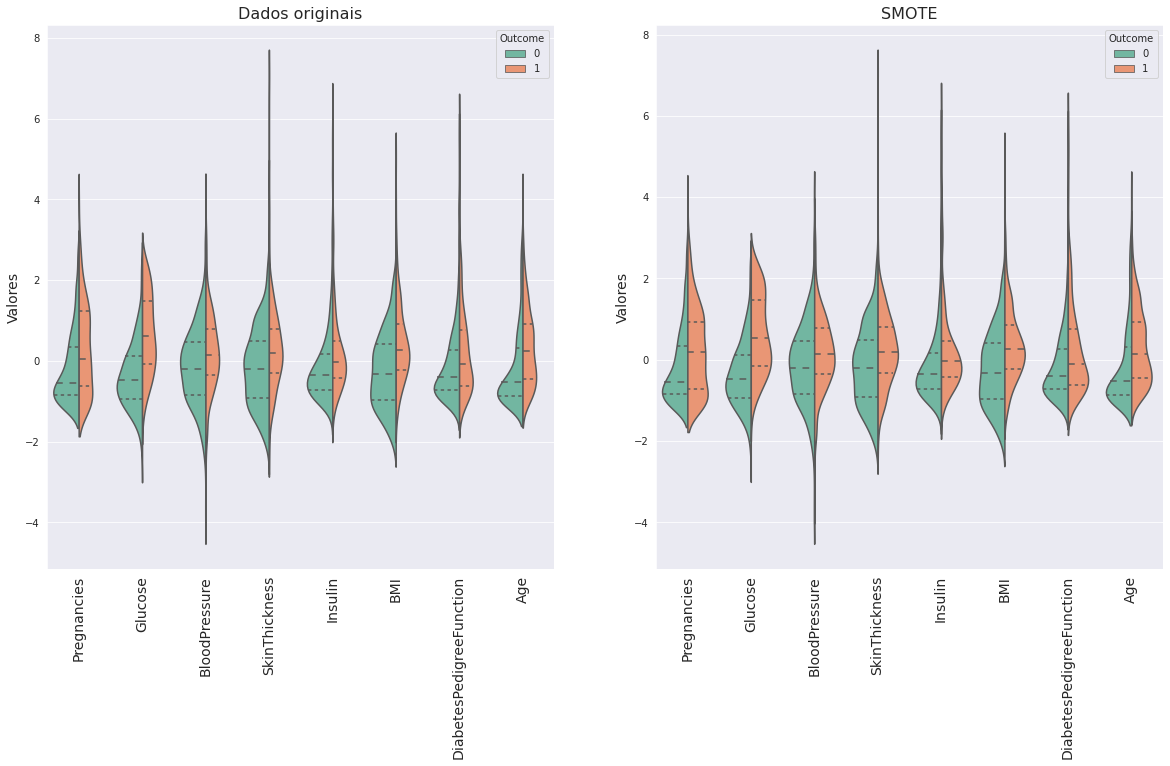

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
sns.violinplot(ax=ax1, x='variaveis', y='valores', hue='Outcome',
                split=True, palette='Set2', scale='count', inner='quartile', data=dados_plot)
ax1.set_xticklabels(list(copy.keys()), rotation=90, fontsize=14)
ax1.set_xlabel(None)
ax1.set_ylabel('Valores', fontsize=14)
ax1.set_title('Dados originais', fontsize=16)
sns.violinplot(ax=ax2, x='variaveis', y='valores', hue='Outcome',
                split=True, palette='Set2', scale='count', inner='quartile', data=dados_plot2)
ax2.set_xticklabels(list(copy.keys()), rotation=90, fontsize=14)
ax2.set_xlabel(None)
ax2.set_ylabel('Valores', fontsize=14)
ax2.set_title('SMOTE', fontsize=16)
plt.show()

Testando modelos de classificação

Regressão logística

dados originais

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_padrao, y_data, test_size=0.3, random_state=2022)
logreg = LogisticRegression()

Validação cruzada

In [25]:
score = cross_val_score(logreg, x_train, y_train, cv=5)
print(f'score mean: {score.mean()}\nscore std: {score.std()}')

score mean: 0.7671512634129456
score std: 0.02566990888668556


In [26]:
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
accuracy_score(y_test, y_pred)

0.7619047619047619

precisão - mede a precisão de um resultado previsto como positivo

In [27]:
precision_score(y_test, y_pred)

0.6470588235294118

revocação - mede a força do modelo em prever um resultado positivo

In [28]:
recall_score(y_test, y_pred)

0.4714285714285714

Text(0.5, 15.0, 'Previsto')

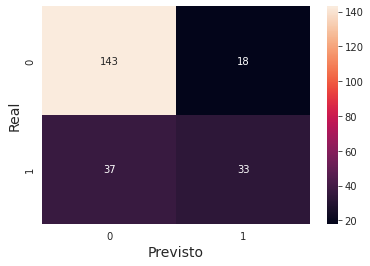

In [29]:
matriz_conf = confusion_matrix(y_test, y_pred)
sns.heatmap(matriz_conf, annot=True, fmt='d')
plt.ylabel('Real', fontsize=14)
plt.xlabel('Previsto', fontsize=14)

SMOTE

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2022)
logreg2 = LogisticRegression()

In [31]:
score = cross_val_score(logreg, x_train, y_train, cv=5)
print(f'score mean: {score.mean()}\nscore std: {score.std()}')

score mean: 0.7444444444444445
score std: 0.005939138709164965


In [32]:
logreg.fit(x_train, y_train)

LogisticRegression()

In [33]:
y_pred = logreg.predict(x_test)
accuracy_score(y_test, y_pred)

0.7518518518518519

In [34]:
precision_score(y_test, y_pred)

0.7064220183486238

In [35]:
recall_score(y_test, y_pred)

0.6875

Text(0.5, 15.0, 'Previsto')

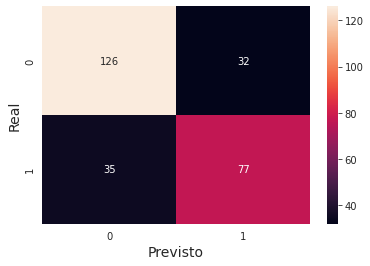

In [36]:
matriz_conf = confusion_matrix(y_test, y_pred)
sns.heatmap(matriz_conf, annot=True, fmt='d')
plt.ylabel('Real', fontsize=14)
plt.xlabel('Previsto', fontsize=14)

K-Vizinhos mais próximos

dados originais

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_padrao, y_data, test_size=0.3, random_state=2022)
knn = KNeighborsClassifier()

In [38]:
score = cross_val_score(knn, x_train, y_train, cv=5)
print(f'score mean: {score.mean()}\nscore std: {score.std()}')

score mean: 0.7299757701626859
score std: 0.03129087444816522


In [39]:
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.7316017316017316

In [40]:
precision_score(y_test, y_pred)

0.5606060606060606

In [41]:
recall_score(y_test, y_pred)

0.5285714285714286

Text(0.5, 15.0, 'Previsto')

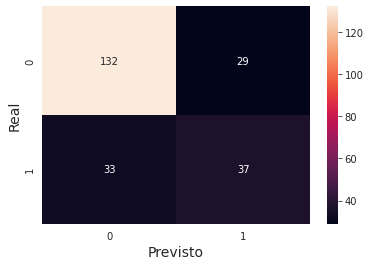

In [42]:
matriz_conf = confusion_matrix(y_test, y_pred)
sns.heatmap(matriz_conf, annot=True, fmt='d')
plt.ylabel('Real', fontsize=14)
plt.xlabel('Previsto', fontsize=14)

SMOTE

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2022)
knn = KNeighborsClassifier()

In [44]:
score = cross_val_score(knn, x_train, y_train, cv=5)
print(f'score mean: {score.mean()}\nscore std: {score.std()}')

score mean: 0.7523809523809524
score std: 0.03069695175525986


In [45]:
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.7222222222222222

In [46]:
precision_score(y_test, y_pred)

0.6370370370370371

In [47]:
recall_score(y_test, y_pred)

0.7678571428571429

Text(0.5, 15.0, 'Previsto')

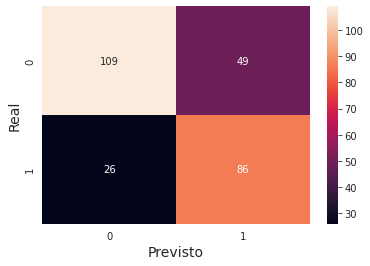

In [48]:
matriz_conf = confusion_matrix(y_test, y_pred)
sns.heatmap(matriz_conf, annot=True, fmt='d')
plt.ylabel('Real', fontsize=14)
plt.xlabel('Previsto', fontsize=14)